In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

part = 16
reps = int(10e3*part**2)
T =0.5
b = 1/T

In [3]:
#Definimos una función para aplicar las condiciones de contorno.

def idx(n):
    return int(n%part)

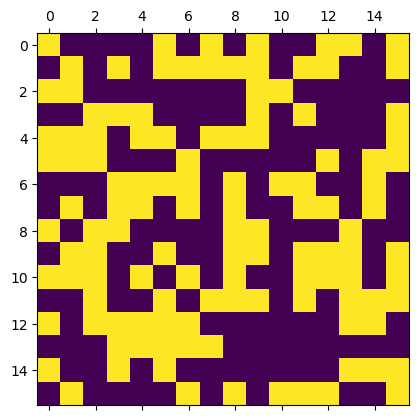

C:\Users\Pablo UGR\AppData\Local\Temp\ipykernel_34696\4096712099.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(np.random.random(1)*part)
C:\Users\Pablo UGR\AppData\Local\Temp\ipykernel_34696\4096712099.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(np.random.random(1)*part)
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\Pablo UGR\AppData\Local\Temp\ipykernel_34696\4096712099.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.

In [ ]:
#Para la animación del GIF

s = np.random.rand(part, part)
for j in range (part):
    for k in range (part):
        if s[j][k] <= 0.5:
            s[j][k] = -1
        else:
            s[j][k] = 1
plt.matshow(s)
plt.show()



def generate_data(s):
        
    #for j in range (reps):
    #Elegir un punto aleatorio del array en cuestión
    n = int(np.random.random(1)*part)
    m = int(np.random.random(1)*part)


    #Sumamos todos los spines de la matriz para calcular la magnetización del lattice (suma de los spins normalizada)
    mag = s.sum()/part**2
    magnet.append(mag)
    
    #Calculamos ΔE = 2s(n,m)[s(n+1,m) + (s(n-1,m) + s(n,m+1) + s(n,m-1)] con condiciones de contorno periódicas
    delta_E = 2*s[idx(n)][idx(m)]*(s[idx(n+1)][idx(m)] + s[idx(n-1)][idx(m)] + s[idx(n)][idx(m+1)] + s[idx(n)][idx(m-1)])


    #Calculamos p con la temperatura T; p = min{1, exp(-ΔE/T)}
    p = min(1, np.exp(-delta_E/T))


    #Generamos un número aleatorio e entre 0 y 1
    e = np.random.random(1)
    if p >= e:
        s[n][m] = -1*int(s[n][m])
    
    return s

magnetization = np.array(magnet)


def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    while True:
        yield generate_data(s)

fig, ax = plt.subplots()
mat = ax.matshow(generate_data(s))
ani = animation.FuncAnimation(fig, update, data_gen, interval=20, save_count = reps)


ani.save('animation.gif')
plt.show()

print(len(xaxis), len(magnet))

fig2 = plt.figure()
plt.matshow(s)
plt.show()

fig3 = plt.figure(dpi = 250)
plt.ylabel(r'Magnetización $\mathcal{M}$')
plt.xlabel(r'Pasos')
plt.plot(xaxis, magnet)
plt.show()

C:\Users\Pablo UGR\AppData\Local\Temp\ipykernel_34696\561103436.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(np.random.random(1)*part)
C:\Users\Pablo UGR\AppData\Local\Temp\ipykernel_34696\561103436.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(np.random.random(1)*part)


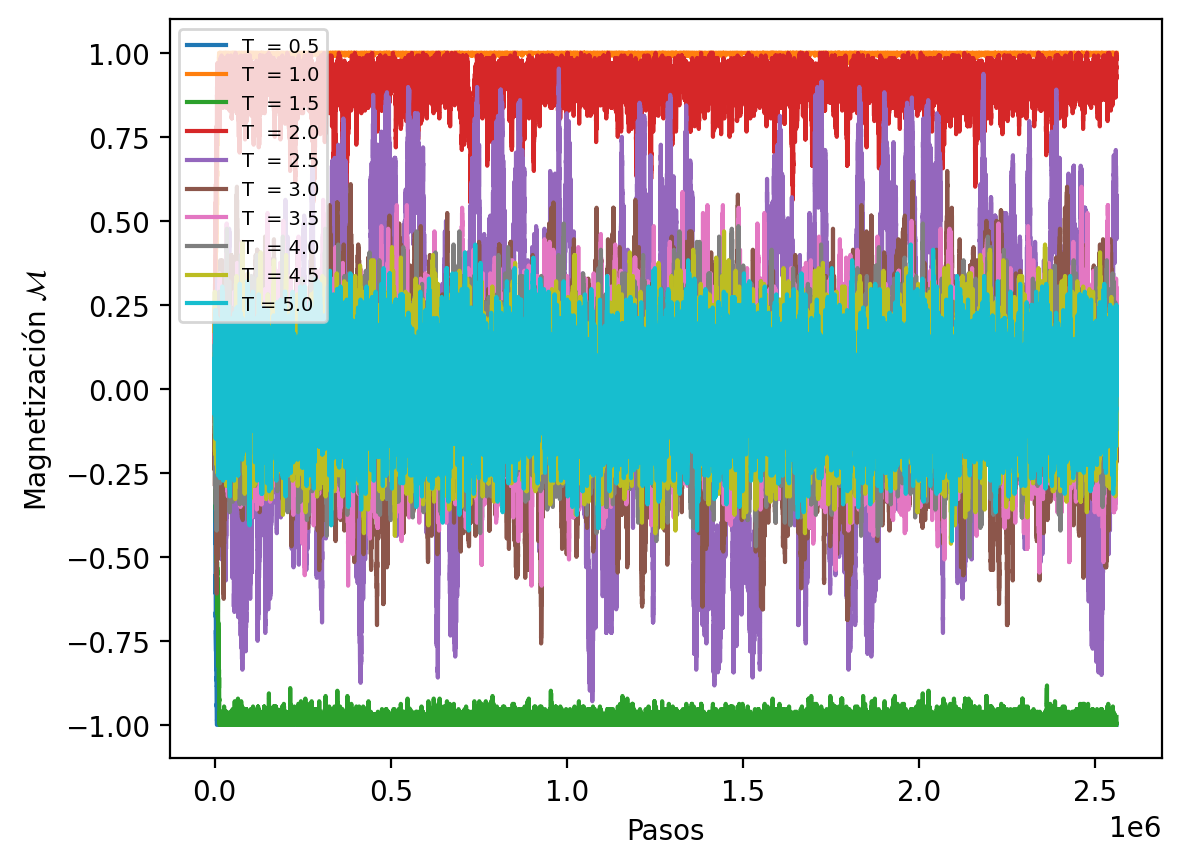

In [5]:
#Esta parte del programa es para hacer las gráficas para cada temperatura.

magnet = [[], [], [], [], [], [], [], [], [], []]
xax = np.arange(reps)
nombres = ['T  = 0.5', 'T  = 1.0', 'T  = 1.5', 'T  = 2.0', 'T  = 2.5', 'T  = 3.0', 'T  = 3.5', 'T  = 4.0', 'T  = 4.5', 'T = 5.0']

for i in range (0, 10):
    s = np.random.rand(part, part)
    for j in range (part):
        for k in range (part):
            if s[j][k] <= 0.5:
                s[j][k] = -1
            else:
                s[j][k] = 1

                
    T = 0.5 + i*0.5
    mag = 0.0
    
    for j in range (reps):
        #Elegir un punto aleatorio del array en cuestión
        n = int(np.random.random(1)*part)
        m = int(np.random.random(1)*part)


            #Sumamos todos los spines de la matriz para calcular la magnetización del lattice (suma de los spins normalizada)
        mag = s.sum()/part**2
        magnet[i].append(mag)

            #Calculamos ΔE = 2s(n,m)[s(n+1,m) + (s(n-1,m) + s(n,m+1) + s(n,m-1)] con condiciones de contorno periódicas
        delta_E = 2*s[idx(n)][idx(m)]*(s[idx(n+1)][idx(m)] + s[idx(n-1)][idx(m)] + s[idx(n)][idx(m+1)] + s[idx(n)][idx(m-1)])


            #Calculamos p con la temperatura T; p = min{1, exp(-ΔE/T)}
        p = min(1, np.exp(-delta_E/T))


            #Generamos un número aleatorio e entre 0 y 1
        e = np.random.random(1)
        if p >= e:
            s[n][m] = -1*int(s[n][m])
            
fig4 = plt.figure(dpi = 200)
for k in range (0, 10):
    plt.plot(xax, magnet[k], label = nombres[k])
    plt.ylabel(r'Magnetización $\mathcal{M}$')
    plt.xlabel(r'Pasos')
    plt.legend(loc="upper left", fontsize = 7)

#plt.savefig('magnet.pdf')


            

10
[0.9576159790039063, -0.9906416259765625, 0.983929458618164, -0.9139907684326172, 0.03720748291015625, -0.006862008666992187, 0.008144320678710938, -0.0030784698486328124, 0.0028004180908203125, -0.001793756103515625]


<ErrorbarContainer object of 3 artists>

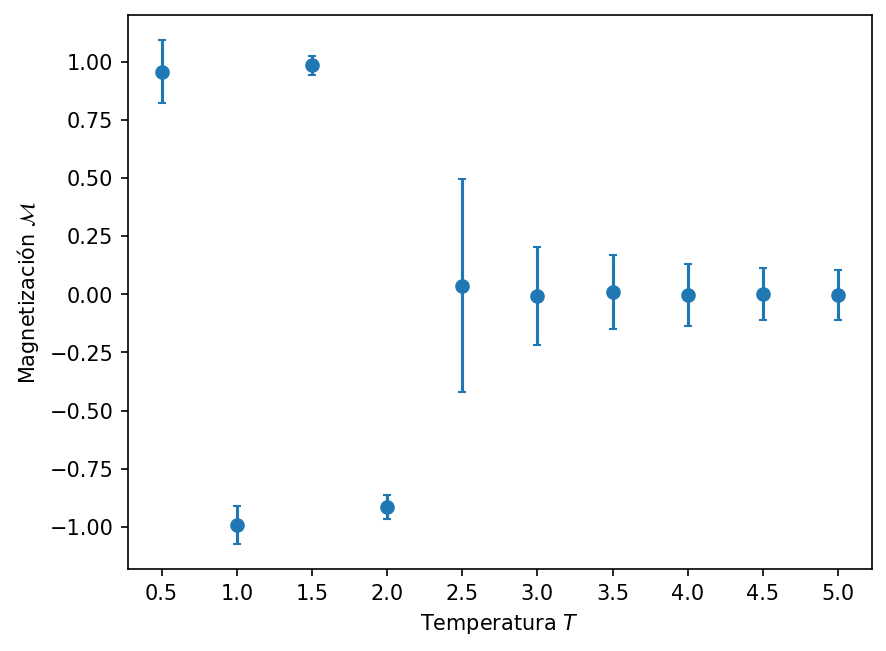

In [37]:
#Plotear la magnetización en función de la temperatura

magnetiz = np.array(magnet)
average_magn = []
errorbar = []

xaxis = np.arange(0.5, 5.5, 0.5)
print(len(xaxis))

for j in range (0, len(magnetiz)):
        average_magn.append(np.average(magnetiz[j]))
        errorbar.append(np.std(magnetiz[j]))
        
        
print(average_magn)
fig5 = plt.figure(dpi = 150)
plt.ylabel(r'Magnetización $\mathcal{M}$')
plt.xlabel(r'Temperatura $T$')
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.yticks(np.arange(-1.0, 1.25, 0.25))
plt.errorbar(xaxis, average_magn, yerr = errorbar, fmt = 'o', capsize = 2)